In [2]:
import tensorflow as tf;
import os;
import numpy as np;
from PIL import Image;
import matplotlib.pyplot as plt;

创建图
载入图片
images/car.jpg
images/car.jpg


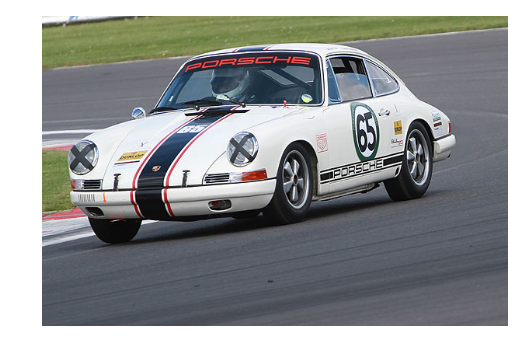

文件加载完成
racer, race car, racing car (score = 0.53743)
sports car, sport car (score = 0.31980)
passenger car, coach, carriage (score = 0.04545)
car wheel (score = 0.00766)
pickup, pickup truck (score = 0.00205)
完成
载入图片
images/cat.jpg
images/cat.jpg


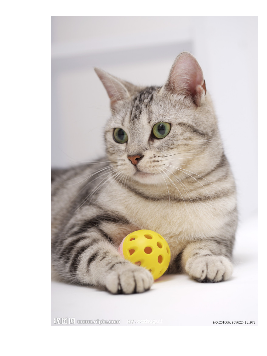

文件加载完成
tabby, tabby cat (score = 0.53761)
Egyptian cat (score = 0.23186)
tiger cat (score = 0.12528)
pill bottle (score = 0.00531)
lynx, catamount (score = 0.00489)
完成
载入图片
images/dog.jpg
images/dog.jpg


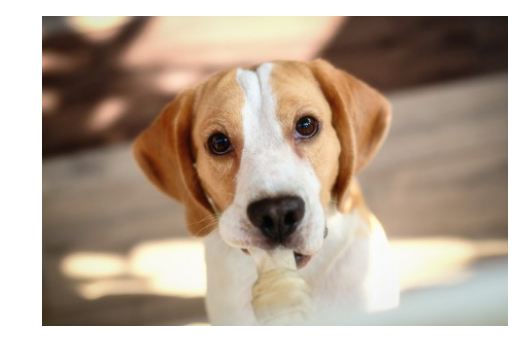

文件加载完成
English foxhound (score = 0.50043)
Walker hound, Walker foxhound (score = 0.24357)
beagle (score = 0.12593)
Brittany spaniel (score = 0.01238)
Labrador retriever (score = 0.00864)
完成
载入图片
images/house.jpg
images/house.jpg


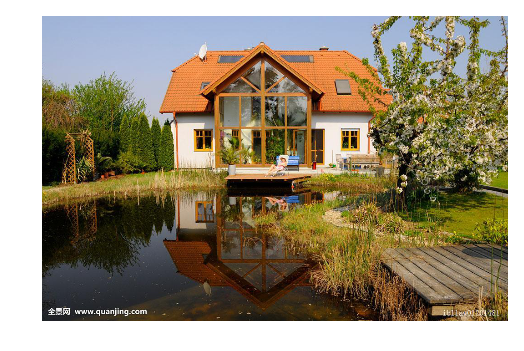

文件加载完成
boathouse (score = 0.93279)
lakeside, lakeshore (score = 0.02064)
castle (score = 0.00438)
tile roof (score = 0.00193)
beacon, lighthouse, beacon light, pharos (score = 0.00092)
完成
载入图片
images/people.jpg
images/people.jpg


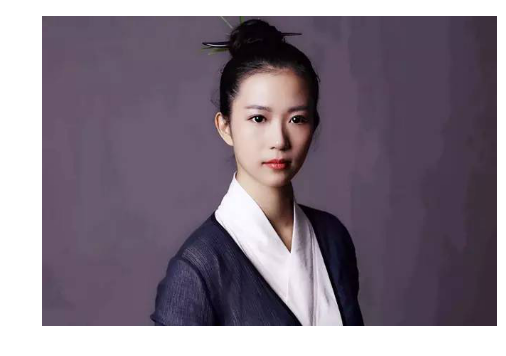

文件加载完成
kimono (score = 0.66172)
suit, suit of clothes (score = 0.12607)
pajama, pyjama, pj's, jammies (score = 0.03025)
lab coat, laboratory coat (score = 0.00888)
stole (score = 0.00440)
完成


In [24]:
class NodeLookup(object):
    def __init__(self):
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt';
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt';
        self.node_lookup = self.load(label_lookup_path,uid_lookup_path);
    
    #加载label文件，生成id和string的对应关系
    def load(self,label_lookup_path,uid_lookup_path):
        #加载分类字符串n***********对应分类名称的文件
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines();
        uid_to_human = {};
        #一行一行读取数据
        for line in proto_as_ascii_lines:
            #去掉换行符
            line = line.strip('\n');
            #按照“\t”分割
            parsed_items = line.split('\t');
            #获取分类编码
            uid = parsed_items[0];
            #获取分类名称
            human_string = parsed_items[1];
            #保存编号字符串n*******与分类名称的映射关系
            uid_to_human[uid] = human_string;
        
        #加载分类字符串n*********对应分类编号1-1000的文件
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines();
        node_id_to_uid = {};
        for line in proto_as_ascii:
            if line.startswith('  target_class:'):
                #获取分类编号1-1000
                target_class = int(line.split(': ')[1])
            if line.startswith('  target_class_string:'):
                #获取编号字符串n********
                target_class_string = line.split(': ')[1]
                #保存分类编号1-1000与编号字符串n********映射关系
                node_id_to_uid[target_class] = target_class_string[1:-2]
            
        node_id_to_name ={};
        for key,val in node_id_to_uid.items():
            #获取分类名称
            name = uid_to_human[val];
            #建立分类编码1-1000名称的银蛇关系
            node_id_to_name[key] = name;
        print("文件加载完成");
        return node_id_to_name;
    
    #根据ID 获取对应字符串
    def id_to_string(self,node_id):
        if node_id not in self.node_lookup:
            return '';
        return self.node_lookup[node_id];
    
#创建一张图存放google训练好的模型
with  tf.gfile.FastGFile("inception_model/classify_image_graph_def.pb","rb") as f:
    graph_def = tf.GraphDef();
    graph_def.ParseFromString(f.read());
    tf.import_graph_def(graph_def,name="");
    print("创建图");
    
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name("softmax:0");
    #遍历目录
    for root,dirs,files in os.walk("images/"):
        for file in files:
            print("载入图片");
            #载入图片
            imgfile = root+file;
            print(imgfile);
            image_data = tf.gfile.FastGFile(imgfile, 'rb').read();
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据
            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            #排序
            top_k = predictions.argsort()[-5:][::-1]
            node_lookup = NodeLookup()
            for node_id in top_k:     
                #获取分类名称
                human_string = node_lookup.id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print("完成");
       